In [73]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
import graphviz
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [7]:
X = pd.read_csv('german.data', sep=' ', header=None)
cat_features = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]
new_cat_features = pd.get_dummies(X[cat_features])
X.drop(cat_features, axis=1, inplace=True)
X = pd.concat((X, new_cat_features), axis=1)
y = X[20]
X.drop(20, axis=1, inplace=True)

In [110]:
classifier = DecisionTreeClassifier(max_depth=3, criterion='gini')
classifier.fit(X, y)
classifier.score(X, y)

0.751

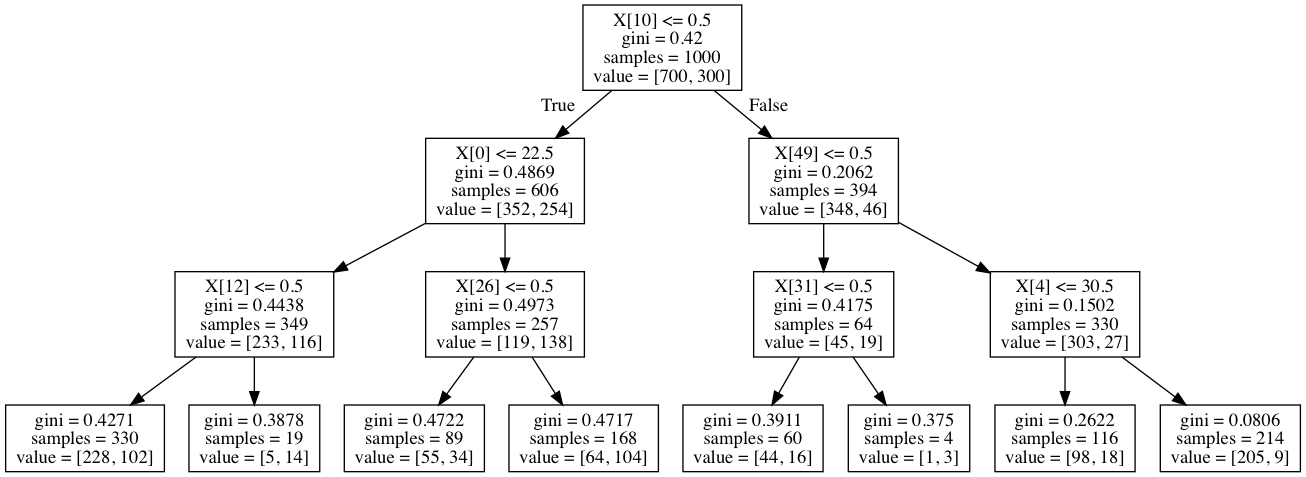

In [111]:
tree.export_graphviz(classifier, 'tree.dot')
!dot -Tpng tree.dot > output.png
Image(filename = "output.png", width=1000, height=100)

In [112]:
depths = np.arange(1, 15)
cv_score = []
test_score = []
for depth in depths:
    cv_score.append(cross_val_score(DecisionTreeClassifier(max_depth=depth), \
                                    X, y, cv=5).mean())
    test_score.append(DecisionTreeClassifier(max_depth=depth)\
                      .fit(X, y)\
                      .score(X, y))

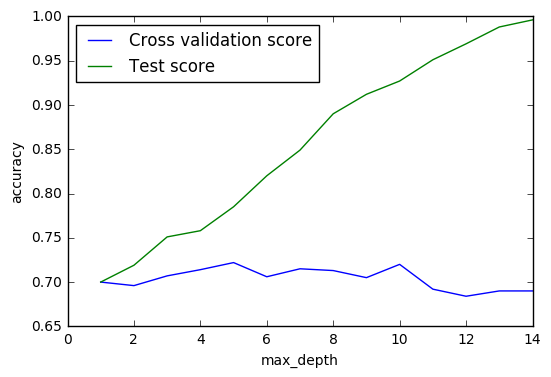

In [114]:
plt.plot(depths, cv_score, label='Cross validation score')
plt.plot(depths, test_score, label='Test score')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()